In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data.dataset import random_split
from torchvision import datasets
from sklearn.metrics import confusion_matrix
import PIL

In [2]:
##Do Not Touch This Cell

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 5)
        self.conv2 = nn.Conv2d(8, 16, 3)
        self.bn1 = nn.BatchNorm2d(8)
        self.bn2 = nn.BatchNorm2d(16)
        self.fc1 = nn.Linear(16*6*6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.bn2(self.conv2(out)))
        out = F.max_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out



In [3]:
##Do Not Touch This Cell

device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = Net().to(device)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)
if device =='cuda':
    print("Train on GPU...")
else:
    print("Train on CPU...")

Train on GPU...


In [4]:
##Do Not Touch This Cell
max_epochs = 50

random_seed = 671
torch.manual_seed(random_seed)

In [5]:
train_transform = transforms.Compose(
     [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

test_transform = transforms.Compose(
     [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, 
                                       transform=train_transform)
##TODO: Split the set into 80% train, 20% validation (there are 50K total images)
train_num = int(0.8 * 50000)
val_num = int(0.2 * 50000)
train_set, val_set = random_split(dataset, [train_num, val_num])

train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=128, shuffle=False)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                        download=True, transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=False)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 
           'frog', 'horse', 'ship', 'truck']

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [6]:
len(train_set)

40000

In [7]:
loss_list, acc_list = [], []
loss_list_val, acc_list_val = [], []
criterion = nn.CrossEntropyLoss()

for epoch in range(max_epochs):
    #TODO: set the net to train mode:
    model_t = net.train()

    epoch_loss = 0.0
    correct = 0
    for batch_idx, (data, labels) in enumerate(train_loader):
        data, labels = data.to(device), labels.to(device)

        optimizer.zero_grad()
        ##TODO: pass the data into the network and store the output
        output = model_t(data)

        ##TODO: Calculate the cross entropy loss between the output and target
        loss = criterion(output, labels) 
        
        ##TODO: Perform backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        ##TODO: Get the prediction from the output
        _, predicted = torch.max(output.data, 1)

        ##TODO: Calculate the correct number and add the number to correct
        correct += (predicted == labels).sum()

        ##TODO: Add the loss to epoch_loss.
        epoch_loss += loss

    ##TODO: calculate the average loss
    avg_loss = epoch_loss / len(train_set)

    ##TODO: calculate the average accuracy
    avg_acc = correct / len(train_set)

    ##TODO: append average epoch loss to loss list
    loss_list.append(avg_loss)

    ##TODO: append average accuracy to accuracy list
    acc_list.append(avg_acc)



    # validation
    ##TODO: set the model to eval mode
    model_val = net.eval()

    with torch.no_grad():
        loss_val = 0.0
        correct_val = 0
        for batch_idx, (data, labels) in enumerate(val_loader):
            data, labels = data.to(device), labels.to(device)
            ##TODO: pass the data into the network and store the output
            output_val = model_val(data)

            ##TODO: Calculate the cross entropy loss between the output and target 
            loss_val_ = criterion(output_val, labels)

            ##TODO: Get the prediction from the output
            _, predicted_val = torch.max(output_val.data, 1)

            ##TODO: Calculate the correct number and add the number to correct_val
            correct_val += (predicted_val == labels).sum()

            ##TODO: Add the loss to loss_val
            loss_val += loss_val_

        ##TODO: calculate the average loss of validation
        avg_loss_val = loss_val / len(test_set)

        ##TODO: calculate the average accuracy of validation
        avg_acc_val = correct_val / len(test_set)

        ##TODO: append average epoch loss to loss list of validation
        loss_list_val.append(avg_loss_val)

        ##TODO: append average accuracy to accuracy list of validation
        acc_list_val.append(avg_acc_val)

    print('[epoch %d] loss: %.5f accuracy: %.4f val loss: %.5f val accuracy: %.4f' % (epoch + 1, avg_loss, avg_acc, avg_loss_val, avg_acc_val))

[epoch 1] loss: 0.01591 accuracy: 0.2610 val loss: 0.01390 val accuracy: 0.3579
[epoch 2] loss: 0.01234 accuracy: 0.4176 val loss: 0.01163 val accuracy: 0.4683
[epoch 3] loss: 0.01088 accuracy: 0.4937 val loss: 0.01062 val accuracy: 0.5151
[epoch 4] loss: 0.01002 accuracy: 0.5396 val loss: 0.00987 val accuracy: 0.5547
[epoch 5] loss: 0.00947 accuracy: 0.5695 val loss: 0.00991 val accuracy: 0.5523
[epoch 6] loss: 0.00911 accuracy: 0.5879 val loss: 0.01009 val accuracy: 0.5614
[epoch 7] loss: 0.00877 accuracy: 0.6035 val loss: 0.00908 val accuracy: 0.5976
[epoch 8] loss: 0.00850 accuracy: 0.6174 val loss: 0.00937 val accuracy: 0.5924
[epoch 9] loss: 0.00823 accuracy: 0.6284 val loss: 0.00859 val accuracy: 0.6161
[epoch 10] loss: 0.00802 accuracy: 0.6374 val loss: 0.00857 val accuracy: 0.6217
[epoch 11] loss: 0.00783 accuracy: 0.6459 val loss: 0.00854 val accuracy: 0.6227
[epoch 12] loss: 0.00758 accuracy: 0.6597 val loss: 0.00817 val accuracy: 0.6356
[epoch 13] loss: 0.00742 accuracy: 0.

In [8]:
loss_list1 = [loss_list[i].item() for i in range(len(loss_list))]
loss_list_val1 = [loss_list_val[i].item() for i in range(len(loss_list_val))]
acc_list1 = [acc_list[i].item() for i in range(len(acc_list))]
acc_list_val1 = [acc_list_val[i].item() for i in range(len(acc_list_val))]


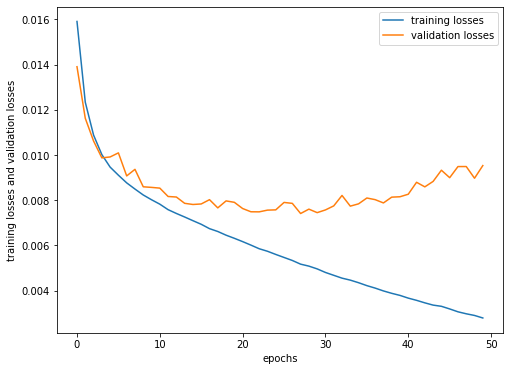

In [9]:
##TODO: Plot the training losses and validation losses
X = range(max_epochs)
y1 = loss_list1
y2 = loss_list_val1
fig1, ax1 = plt.subplots(figsize=(8,6))
plt.plot(X, y1)
plt.plot(X, y2)
plt.xlabel('epochs')
plt.ylabel('training losses and validation losses')
plt.legend(['training losses', 'validation losses']);


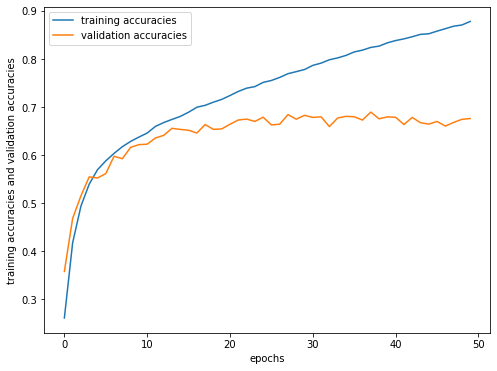

In [10]:
##TODO: Plot the training accuracies and validation accuracies
X = range(max_epochs)
y3 = acc_list1
y4 = acc_list_val1
fig2, ax2 = plt.subplots(figsize=(8,6))
plt.plot(X, y3)
plt.plot(X, y4)
plt.xlabel('epochs')
plt.ylabel('training accuracies and validation accuracies')
plt.legend(['training accuracies', 'validation accuracies']);

This model overfits on the data. Because the training accuracy is higher than validation accuracy.

In [11]:
#Test
true_labels = []
predictions = []
correct_test = 0
model_test = net.eval()
with torch.no_grad():
    for batch_idx, (data, label) in enumerate(test_loader):
        data, label = data.to(device), label.to(device)
        ##TODO: pass the data into the network and store the output
        output_test = model_test(data)

        ##TODO: Get the prediction from the output
        _, predicted_test = torch.max(output_test.data, 1)


        ##TODO: Calculate the correct number and add the number to correct_test
        correct_test += (predicted_test == label).sum()


        ##TODO: update predictions list and true label list
        true_labels.append(label.item())
        predictions.append(predicted_test.item())

        ##We can directly append the value because here batch_size=1



print('Accuracy on the 10000 test images: %.2f %%' % (100 * correct_test / len(test_set)))

Accuracy on the 10000 test images: 67.55 %


In [12]:
##TODO: print the confusion matrix of test set
##You can use sklearn.metrics.confusion_matrix
confusion_matrix(true_labels, predictions)

array([[671,  28,  61,  13,  53,  11,  20,  22,  86,  35],
       [ 18, 821,   3,   6,   6,   1,  16,   7,  34,  88],
       [ 63,  11, 520,  61, 127,  39,  92,  58,  23,   6],
       [ 21,  13,  69, 441, 105, 100, 144,  64,  24,  19],
       [ 10,  10,  52,  42, 669,  14,  89,  91,  17,   6],
       [ 11,   4,  60, 198,  95, 433,  80, 101,   7,  11],
       [  4,   7,  23,  44,  41,  13, 853,   8,   6,   1],
       [ 13,  10,  23,  34,  74,  31,  15, 779,   4,  17],
       [ 57,  57,  17,  10,  18,   2,   7,   6, 796,  30],
       [ 26, 115,   9,  10,  14,   1,   6,  18,  29, 772]])

Cat and dog get confused most. This makes sense because cat looks very similar to dogs.